<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [ ]:
#insert your information
NAME = 'Mohammadreza Monemain'
STUDENT_NUMBER = '402106604'

# Libraries

In [5]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import combinations
from collections import Counter

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [ ]:
# Create a random graph with blocked edges (None means blocked)
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [ ]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()



# DFS

In [ ]:
def dfs(graph, start, goal):
    #TODO: implement DFS search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    path = []
    explored = set()
    stack = [(start, [start])]
    visited = set()
    is_appear = False

    while stack:
        node, path = stack.pop()
        if node == goal:
            is_appear = True
            break
        if node not in visited:
            visited.add(node)
            explored.add(node)
            for neighbor in reversed(graph[node]):
                stack.append((neighbor, path + [neighbor]))
    if not is_appear:
        path.clear()
    return path, explored


# BFS

In [ ]:
from collections import deque
def bfs(graph, start, goal):
    #TODO: implement BFS search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored

    queue  = deque([[start]])
    explored = set()

    while queue :
      path = queue.popleft()
      node = path[-1]
      if node == goal :
        return path , list(explored)

      if node not in explored:
          explored.add(node)
          for nighbor in reversed(graph[node]):
            new_path = path + [nighbor]
            queue.append(new_path)


    return [],list(explored)


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

Your Answer:
<br>
<br>
<div dir="rtl" style="font-size:22px; color:blue;">
<font color=orange size=4>
  همانطور که مشاهده کردیم رویکرد نگرش <strong>DFS</strong> به مسايل اینگونه است که به صورت عمقی جست و جو میکند و یعنی هر گره ای را که باز میکند و در <strong>fringe</strong> قرار میدهد  اولویت برای باز کردن گره بعدی با گره باعمق بیشتر است . در این حالت به این خاطر که هر بار مسیر فعلی را در نظرمی گیرد حافظه کمی  را مصرف میکند اما لزوما بهینه ترین مسیر را خروجی نمیدهد . همچنین اگر جواب در عمق کم باشد، DFS ممکن است ابتدا مسیرهای اشتباه را به صورت کامل  کاوش کند و زمان بیشتری ببرد.
  <br>
  اما وقتی از BFS استفاده  میکنیم رویکرد اینگونه است که به صورت سطری پیمایش میکند و هر گره ای را که باز مکیند همه فرزندان آن را در fringe  قرار میدهد سپس دوباره همه فرزندان فرزندان را نیز جستو جو میکند . این روش سبب میشود که حافظه زیادتری مصرف شود اما در عوض در زمان کمتری نسبت به DFS بهینه ترین جواب را پیدا کنیم.
  بنابراین مزیت اصلی BFS پیدا کردن بهترین جواب باری گراف های غیر وزن دار در زمان کوتاه است اما عیب آن داشتن حافظه زیاد است لکن دقیقا برعکس در DFS حافظه کمی مصرف میشود ولی هم جواب بهینه نیست هم زمان بیشتری مصرف خواهد شد .
  بنابراین میتوانیم از ترکیب این دو یعنی DFS محدودیت عمق بهره ببریم.
<p>
</div>


# A star


In [ ]:
import heapq
# Define heuristic functions
# A* Search (using simple heuristics: Manhattan distance or random)
def manhattan_distance(a, b, pos):
    #TODO: implement manhattan distance
    return abs(pos[a][0] - pos[b][0]) + abs(pos[a][1] - pos[b][1])

# Random heuristic
def random_heuristic(a, b, pos):
    return random.randint(1, 10)  # Random heuristic for demonstration

def a_star(graph, start, goal, heuristic, pos):

    min_heap = []
    heapq.heappush(min_heap, (0, start, [start]))

    g_score = {}
    for node in graph :
      g_score[node] = float('inf')
    g_score[start] = 0

    explored = set()

    while min_heap:
        f, node, path = heapq.heappop(min_heap)

        if node in explored:
            continue

        explored.add(node)

        if node == goal:
            return path, explored

        for neighbor in  reversed(graph[node]):
               if neighbor in explored:
                   continue
               new_g = g_score[node] + 1
               if new_g < g_score[neighbor]:
                    g_score[neighbor] = new_g
                    f_score = new_g +  heuristic(neighbor, goal, pos)
                    heapq.heappush(min_heap, (f_score, neighbor, path + [neighbor]))

    return None, explored

# Results

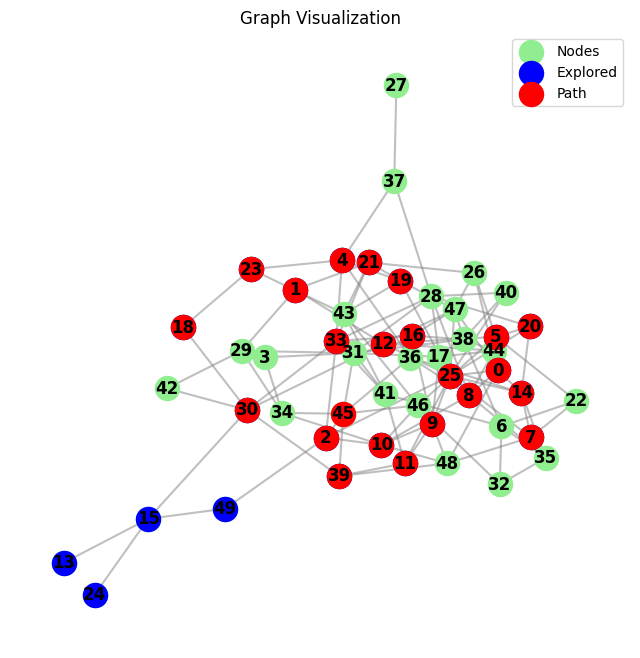

DFS Path: [0, 8, 10, 2, 25, 7, 14, 20, 5, 12, 1, 21, 19, 4, 23, 18, 30, 33, 16, 9, 11, 39, 45]


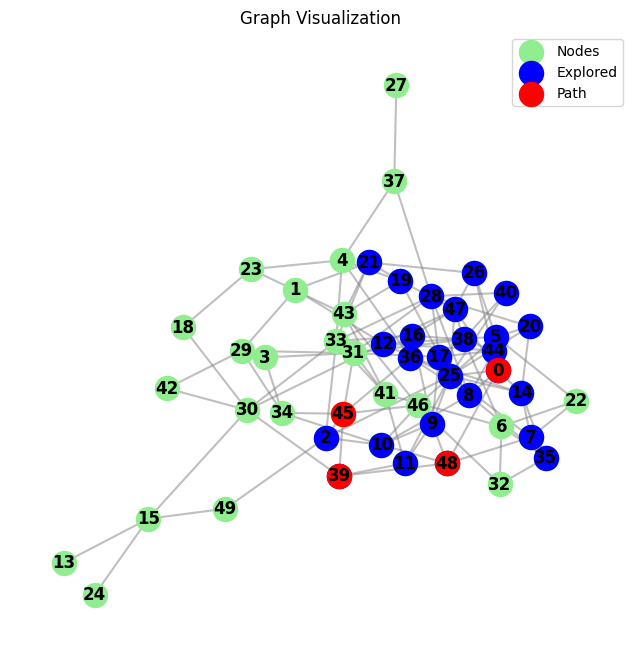

BFS Path: [0, 48, 39, 45]


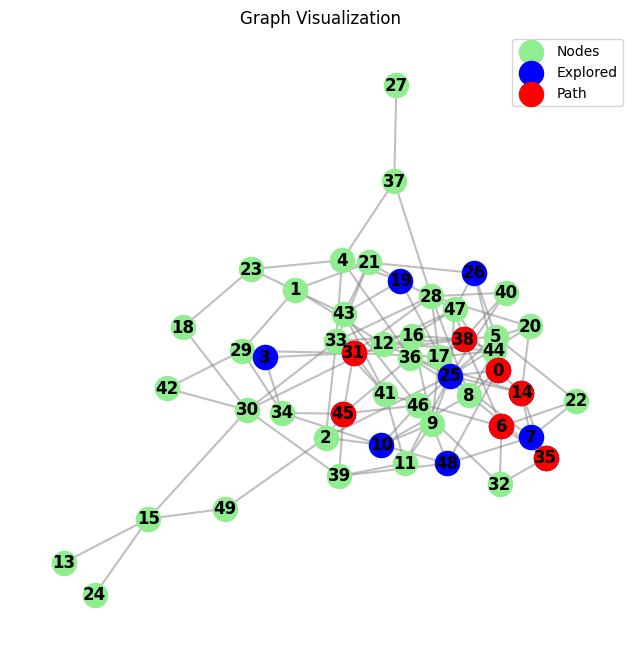

A* Path with Random Heuristic: [0, 14, 35, 6, 38, 31, 45]


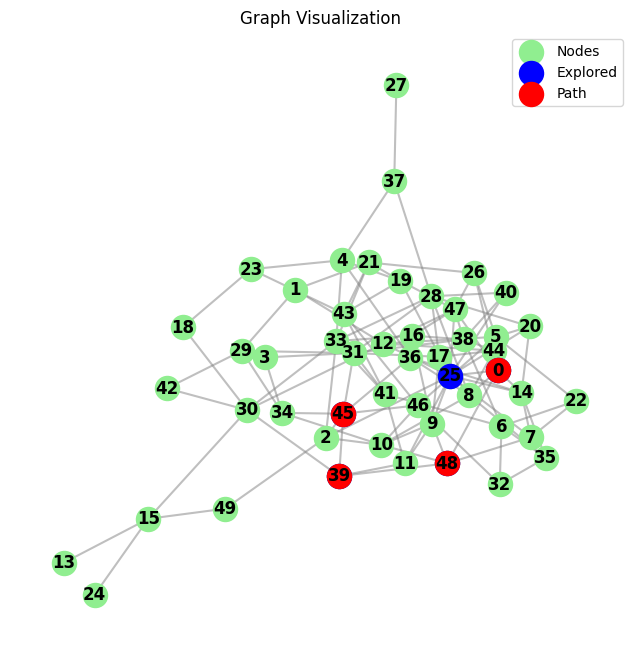

A* Path with Manhattan Distance Heuristic: [0, 48, 39, 45]


In [ ]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random graph
random_graph = generate_random_graph(num_nodes)

# # Get random node positions for Manhattan distance calculation
positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

# Run DFS
path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

# Run BFS
path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

# Run A* with Random Heuristic in same manner as above
path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

# Run A* with Manhattan Distance Heuristic
path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")


**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

Your Answer:
<br>
<div dir="rtl" style="font-size:22px; color:blue;">
<font color=orange size=4>
تابع اکتشافی اول برای انجام الگوریتم A* فاصله منهتنی است . بدین صورت که در پیاده سازی تولید گراف مکان هر گره با توجه به pos مشخص می شود.و فاصله منهتنی گره کنونی تا گره هدف را در صفحه برابر تابعاکتشافی خود میگیریم. واضخ است که در این سوال به این خاطر که h* برابر با تعداد گره های طی شده بین گره مبدا تا گره goal است ممکن است تابع در نظر گرفته شده admissible نباشد و برای همین تضمینی برای optimal بودن آن نیست.
<br>
همچنین در تابع اکتشافی دوم که به صورت رندوم تولید میشود واضحا به خاطر تصادفی بودن تابع اکتشافی ممکن است admissible نباشد .
در هر صورت ااگوریتم A* براساس تابع هیورستیکی که ما تعریف میکنیم و f(x) = h(x) + g(x) به دنبال یافتن مسیر تا goal خواهد بود .
<br>
توجه داریم که  UCS نیز مانند همین الگوریتم عمل میکند با این تفاوت که در UCS تابع اکتشافی ما برای همه گره ها برابر صفر خواهد بود که البته این باعث نقض شدن admissible بودن نخواهد شد.اما صفر کردن تابع اکتشافی برای همه گره ها باعث میشود که الگوریتم به goal توجه نکند و توجه اصلی آن به فاصله تا source باشد برای همین اگرچه جواب بهینه را در هر صورت خواهد داد اما ممکن است که از نظر زمانی از الگوریتمA* با تابع اکتشافی مناسب بدتر باشد.
</div>


# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [ ]:
# Create a random graph with weights on edges
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight  # Undirected graph
    return graph


In [ ]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Display edge weights (weights on the edges)
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS With Cost

In [ ]:
# Depth-First Search (DFS) with weight sum
def dfs_weighted(graph, start, goal):
    #TODO: implement DFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum
    path = []
    explored = set()
    stack = [(start, [start], 0)]
    visited = set()
    is_appear = False

    while stack:
        node, path, weight_sum = stack.pop()
        if node == goal:
            is_appear = True
            break
        if node not in visited:
            visited.add(node)
            explored.add(node)
            for neighbor in reversed(graph[node]):
                stack.append((neighbor, path + [neighbor], weight_sum + graph[node][neighbor]))
    if not is_appear:
        path.clear()
        weight_sum = 0
    return path, weight_sum, explored


# BFS With Cost

In [ ]:
# Breadth-First Search (BFS) with weight sum
def bfs_weighted(graph, start, goal):
    #TODO: implement BFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum

    queue = deque([([start], 0)])
    explored = set()

    while queue :
      path, weight_sum = queue.popleft()
      node = path[-1]
      if node == goal :
        return path, weight_sum, list(explored)

      if node not in explored:
          explored.add(node)
          for neighbor in reversed(graph[node]):
            new_path = path + [neighbor]
            queue.append((new_path, weight_sum + graph[node][neighbor]))


    return [], 0, list(explored)


# Dijkstra (UCS)

In [ ]:
# Dijkstra's Algorithm
def dijkstra(graph, start, goal):
    #TODO: implement Dijkstra search
    # returns the path(list) and weight_sum(int) and explored(list)
    # Reconstruct the path and calculate the weight sum

    # Priority queue to hold nodes to be explored, based on their tentative distance
    # If a shorter path to the neighbor is found, update the priority queue
    # Reconstruct the path and calculate the weight sum

    min_heap = []
    heapq.heappush(min_heap, (0, start, [start]))

    g_score = {}
    for node in graph :
      g_score[node] = float('inf')
    g_score[start] = 0

    explored = set()

    while min_heap:
        weight_sum, node, path = heapq.heappop(min_heap)

        if node in explored:
            continue

        explored.add(node)

        if node == goal:
            return path, weight_sum, explored

        for neighbor in  reversed(graph[node]):
               if neighbor in explored:
                   continue
               new_g = g_score[node] + graph[node][neighbor]
               if new_g < g_score[neighbor]:
                    g_score[neighbor] = new_g
                    weight_sum = new_g
                    heapq.heappush(min_heap, (weight_sum, neighbor, path + [neighbor]))

    return None, 0, explored


# Results

DFS Path: [0, 6, 2, 7, 31, 8, 5, 11, 26, 14, 23, 18, 10, 28, 36, 43, 12, 22, 27, 13, 1, 24, 19, 30, 17, 32, 29, 20, 48, 45]
DFS Weight Sum: 148
BFS Path: [0, 45]
BFS Weight Sum: 10
Dijkstra Path: [0, 45]
Dijkstra Weight Sum: 10


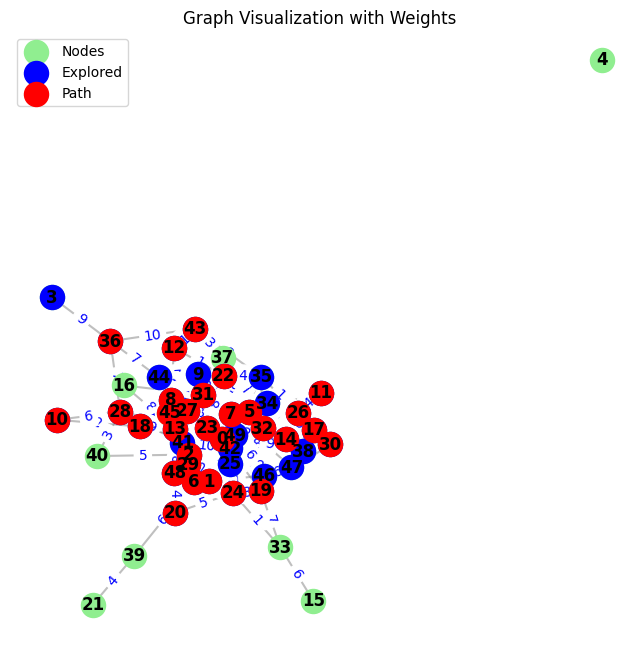

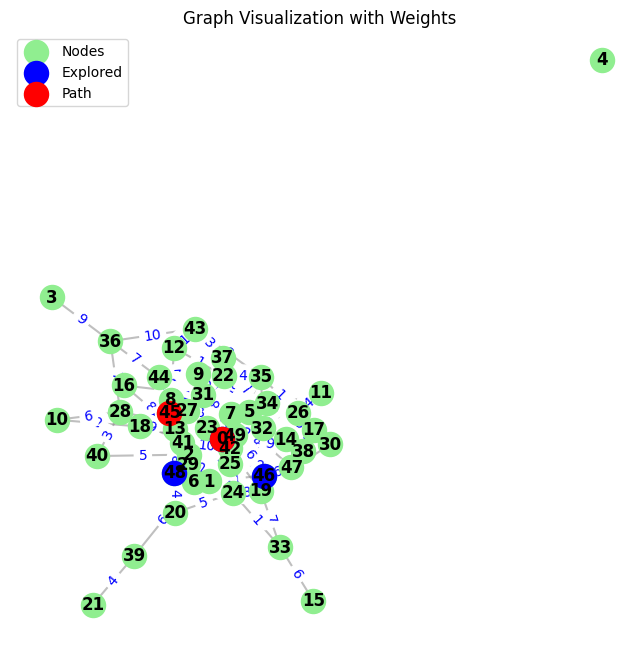

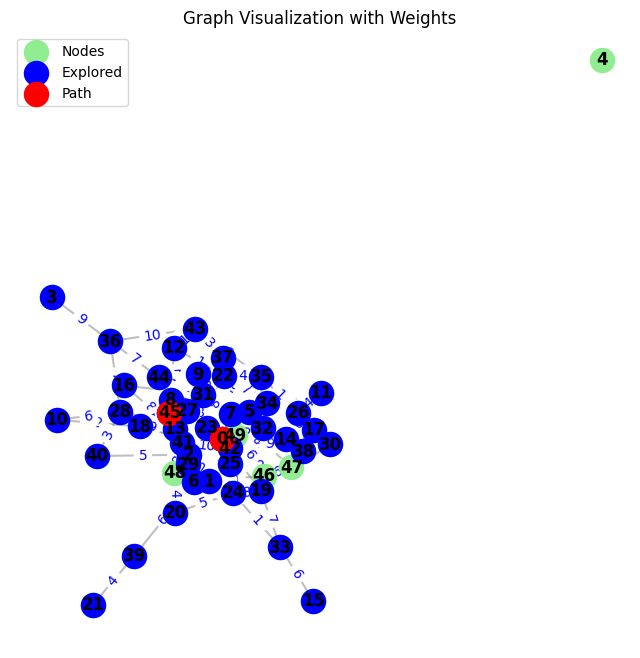

In [ ]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random weighted graph
weighted_graph = generate_weighted_graph(num_nodes)

# Run DFS
path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

# Run BFS
path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

# Run Dijkstra
path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

# Visualize the results
plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

<br>
Your Answer:
<br>
<div dir="rtl" style="font-size:22px; color:blue;">
<font color=orange size=4>
همانطور که در قسمت  قبل مشاهده کردیم برای پیدا کردن مسیر واضخا <strong>BFS</strong> از <strong>DFS</strong> بهتر خواهد بود چرا که اصلا DFS بهنیه ترین مسیر را خروجی نمیداد و همچنین از نظر زمانی نیز مناسب نبود البته BFS نیز حافظه بسیار بیشتری مصرف میکرد . اما وقتی گراف وزن دار باشد دیگر BFS نیز کوتاه ترین مسیر را خروجی نخواهد داد چرا که اصلا به وزن یالها توجه نمیکند . اما UCS که یک نوع جست و جوی حریصانه است بر اساس g(x) گره ها را باز مکیند تا goal را بیابد و بنابراین به وزن یالها توجه دارد و به دنبال یافتن کوتاه ترین مسیر تا goal خواهد بود . بنابراین در این سوال واضحا الگوریتم UCS مناسب تر است .
<br>
همچنین اگر گراف جهت دار بود تنها تفاوت این بود که اگر در گراف ما فقط یال جهتش از A به B بود وقتی گره A expand  میشود بین فرزندانش گره B نیز خواهد بود اما وقتی گره B در زمانی expand بشود گره A میان فرزندان آن نخواهد بود. یعنی تنها باید به جهت یالها توجه داشت.
    
<p>
</div>


# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [2]:
# Sample input for Subset Sum Problem
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]  # Random list of 15 integers between 1 and 10

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [9, 6, 2, 7, 7, 10, 3, 9, 1, 6, 10, 9, 3, 5, 8]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [3]:
def hill_climbing(nums, target_sum):
    #generate neighbor
    def generate_neighbor(nums, father):
        neighbor_list = []

        nums_copy = nums.copy()
        for num in father :
          nums_copy.remove(num)

        for node in nums_copy:
            new_neighbor = father.copy()
            new_neighbor.append(node)
            neighbor_list.append(new_neighbor)

        for node in father:
            new_neighbor = father.copy()
            new_neighbor.remove(node)
            neighbor_list.append(new_neighbor)

        return neighbor_list

    #TODO Hill climbing
    #return a current solution = best state value
    #Hill climbing loop
    #Generate neighbors by adding one element or removing one element
    #Evaluate the neighbors by calculating the sum
    #If no improvement, stop

    #Random initial solution (subset of nums)
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)

    while True:
        neighbors_list = generate_neighbor(nums, current_solution)
        best_neighbor = None
        best_sum = current_sum

        for neighbor in neighbors_list:
            neighbor_sum = sum(neighbor)
            if abs(target_sum - neighbor_sum) < abs(target_sum - best_sum):
                best_sum = neighbor_sum
                best_neighbor = neighbor

        if best_neighbor is None or best_sum == current_sum:
            return current_solution

        current_solution = best_neighbor
        current_sum = best_sum


# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [11]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]  # Best solution in the tournament

def crossover(parent1, parent2):
    # Single-point crossover
    #TODO randomly choose one point and do crossover on that
    #return childs created of process (child1 and child 2)
    child1 = parent1[:]
    child2 = parent2[:]

    min_len_child = min(len(parent1), len(parent2))
    random_index = random.randint(0, min_len_child - 1)

    child1[:random_index], child2[:random_index] = child2[:random_index], child1[:random_index]

    return child1, child2

def mutate(solution, nums, mutation_rate=0.1):
    #TODO
    # Mutate the solution by either adding a random number from nums that isn't in solution or removing a random number from solution
    #chanced are based on mutation_rate (when your chance is less that rate it will happen)
    #return the mutated solution.
    mutate_yes_or_no = random.uniform(0,1)
    if mutate_yes_or_no < 0.1 :
      remove_or_adding = random.uniform(0,1)
      if remove_or_adding <= 0.5 :
        if (not(len(solution) == len(nums))) :
          nums_copy = nums.copy()
          for num in solution:
              nums_copy.remove(num)
          random_index = random.randint(0,len(nums_copy) - 1)
          solution.append(nums_copy[random_index])
      else :
        if not solution:
         random_index = random.randint(0,len(solution) - 1)
         solution.pop( random_index)
    return solution




In [15]:
def is_multiset_sublist(main_list, sub_list):
    main_count = Counter(main_list)
    sub_count = Counter(sub_list)

    for key, value in sub_count.items():
        if main_count[key] < value:
            return False
    return True


def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    # Random initial population
    population = [random.sample(nums, random.randint(1, len(nums))) for _ in range(population_size)]
    #TODO perform Genetic algorithm
    # Sort the population by fitness and select the best solution; if it matches the target, return it.
    # Use tournament selection, crossover, and mutation to create the next generation until the population size is met.
    for i in range(0,50):
      population.sort(key=lambda x: abs(target_sum - sum(x)))
      if  sum(population[0]) ==  target_sum:
        return population[0]
      else:
        new_generation = []
        for step in range(0,population_size // 2) :
          parent1  = tournament_selection(population, target_sum, tournament_size=5)
          parent2  = tournament_selection(population, target_sum, tournament_size=5)
          child1,child2 = crossover(parent1, parent2)
          while  not is_multiset_sublist(nums,child1) or not is_multiset_sublist(nums,child2) :
            child1,child2 = crossover(parent1, parent2)

          mutate(child1, nums, mutation_rate=0.1)
          mutate(child2, nums, mutation_rate=0.1)
          new_generation.append(child1)
          new_generation.append(child2)
        population = new_generation

    return population[0]  # Return the best solution after all generations

# Brute Force

In [13]:
def brute_force(nums, target_sum):
    #TODO check all possible combinations and return the best subset
    best_state = []
    best_diff = float('inf')
    for subset_len in range(0, len(nums)+1):
      for subset in combinations(nums, subset_len):
        diff = abs(sum(subset) - target_sum)
        if diff < best_diff:
          best_state = subset
          best_diff = diff
    return best_state

# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [17]:
# Running the algorithms multiple times with different random setups
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        # Generate random setup for each trial
        target_sum = random.randint(50, 100)  # Random target sum between 10 and 50
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 20))]  # Random list size between 10 and 20
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        # Print the current trial setup
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")

        # Hill Climbing
        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        # Genetic Algorithm
        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        # Brute Force
        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        # Print each trial result
        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    # Calculate average times
    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

# Run the comparison with 10 trials
run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 77, Numbers = [10, 4, 4, 6, 2, 7, 6, 6, 5, 2]
Hill Climbing Result: [6, 10, 7, 6, 6, 5, 4, 4, 2, 2], final sum: 52, Time Taken: 0.0001 seconds
Genetic Algorithm Result: [2, 6, 6, 4, 4, 5, 7, 2, 6, 10], final sum: 52, Time Taken: 0.0439 seconds
Brute Force Result: (10, 4, 4, 6, 2, 7, 6, 6, 5, 2), final sum: 52, Time Taken: 0.0002 seconds

Trial 2: Target Sum = 55, Numbers = [3, 10, 6, 2, 2, 6, 4, 7, 9, 9, 3, 1, 10, 1]
Hill Climbing Result: [7, 2, 10, 3, 9, 2, 6, 10, 6], final sum: 55, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [7, 3, 2, 3, 6, 2, 1, 10, 1, 10, 4, 6], final sum: 55, Time Taken: 0.0025 seconds
Brute Force Result: (10, 6, 4, 7, 9, 9, 10), final sum: 55, Time Taken: 0.0035 seconds

Trial 3: Target Sum = 78, Numbers = [4, 10, 3, 3, 6, 10, 7, 6, 1, 4, 1]
Hill Climbing Result: [10, 6, 7, 6, 3, 4, 1, 4, 10, 3, 1], final sum: 55, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [1, 10, 6, 3, 4, 6, 10, 1, 3, 4, 7], final sum: 55, Time Taken: 0.0

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


Your Answer:
<br>
<div dir="rtl" style="font-size:22px; color:blue;">
<font color=orange size=4>
    همانطور که مشاهده کردیم برای حل سوال اگر بخواهیم جواب دقیق را به دست بیاوریم میتوانیم از روش <strong>brute force </strong>
    استفاده کنیم . هر چند که استفاده از این روش هزینه زمانی و حافظه  زیادی خواهد داشت.چرا که رویکرد این روش این است که بین همه حالات ممکن جست و جو میکند تا چیزی که مورد انتظار است را بیاید. که بدیهتا زمان زیادی خواهد برد . اما جواب را به صورت دقیق در اختیار ما قرار خواهد داد.
    ‌‌<br>
    در الگوریتم <strong>hill climbing</strong>  اما ما از یک جواب تصادفی شروع میکنیم و سعی در بهبود آن داریم به این معنی که بین فرزندان آن <strong>state</strong> بررسی میکنیم اگر فرزندی وجود داشت که از حالت کنونی بهتر باشد به بهترین فرزند خواهیم رفت و هر بار به <strong>goal</strong> نزدیک و نزدیکتر خواهیم شدو همانطور که مشاهده شد اولا به این خاطر که فقط نیاز به ذخیره <strong>state</strong> کنونی داریم و سپس بین فرزندان آن به بررسی میپردازیم از نظر حافظه بسیار مناسب است همچنین زمان یافتن پاسخ نیز در آن کوتاه است . اما نکته ای که دارد این است که ممکن است این الگوریتم طوری پیش برود که ما در <strong>local goal </strong> ها بمانیم یعنی جاهایی که <strong>goal</strong> نهایی نیست ولی  نمی توان آن را بهبود داد.
    <br>
    اما در الگوریتم ژنتیک که یک نوع <strong>local beam search</strong> هست یعنی به جای نگه داشتن یک <strong>state</strong> مناسب <strong>k</strong> حالت  خوب را در نظر میگیرد و همچنین با استفاده از <strong>cross over</strong> ,<strong></strong> از روی <strong>state k </strong> مناسب <strong> state k </strong> مناسب دیگر تولید میکند و همچنین به کمک <strong>mutation</strong> سعی داردکه از <strong>local goal</strong> ها فرار کند ما علاوه بر صرف زمان و حافظه مناسب به جواب دقیق تری از <strong>hill climbing</strong> خواهیم رسید .
    <br>
    بنابراین
    جستجوی ابتدایی برای اندازه‌های کوچک و زمانی که نیاز به جواب بهینه است مناسب است.
    <br>
Hill-Climbing برای مسائل بزرگتر و زمانی که جواب تقریبی کافی است مناسب است.
<br>
الگوریتم ژنتیک برای مسائلی که فضای جستجو پیچیده دارند و روش‌های دیگر قادر به یافتن جواب‌های خوب نیستند، مناسب خواهد بود.
<p>
</div>
